In [1]:
import pandas as pd
from matplotlib import pyplot as plot
import numpy as np

In [2]:
df = pd.read_csv('MTG-OTJ-draft-card.csv')
print(df)

                    Name Color Rarity  # Seen  ALSA  # Picked    ATA   # GP  \
0          Another Round     W      R   64972  6.27      7953   9.59   1690   
1    Archangel of Tithes     W      M    9905  2.08      3697   2.15  18171   
2      Armored Armadillo     W      C  378941  7.89     40803  11.61  31423   
3       Aven Interrupter     W      R   24080  2.42      8609   2.64  44852   
4       Bounding Felidar     W      U   98493  4.11     18079   5.53  86683   
..                   ...   ...    ...     ...   ...       ...    ...    ...   
371     Contagion Engine   NaN      M    6499  2.44      2472   2.60  12573   
372           Grindstone   NaN      M   14203  4.84      1594   7.38   2175   
373           Mindslaver   NaN      M    9966  3.52      2026   4.30   7316   
374    Unlicensed Hearse   NaN      R   18252  3.05      4295   3.70  20486   
375            Dust Bowl   NaN      R   38100  6.57      4232  10.22   1271   

       % GP   GP WR   # OH   OH WR   # GD   GD WR  

In [3]:
The data I found comes from Kaggle.
Link:https://www.kaggle.com/datasets/darrylljk/magic-the-gathering-card-ratings-otj/data
This is draft data on the Magic the Gathering Set: Outlaws of Thunder Junction. Darfting is a unique way to play with a set of magic cards.
This data shows many variables found in drafting, including pick rate, apperance, win rate, use rate, and other factors about each card avaliable in
the set. There are many things I would like to find with this data. The big one is which color found the most success while being drafted. Other questions,
like which color/colors are drafted the most, which cards win the most, and which cards are used the most, should help me sucure a final answer.

SyntaxError: invalid syntax (1125410552.py, line 1)

In [14]:
cols = df.columns
remove = cols[10:]
df.drop(remove, inplace=True, axis=1)

In [16]:
print(df.isnull().sum())

Name         0
Color       46
Rarity       0
# Seen       0
ALSA         0
# Picked     0
ATA          1
# GP         0
% GP         0
GP WR        8
dtype: int64


In [18]:
df2 = df.dropna(subset=['ATA'])
print(df2)

                    Name Color Rarity  # Seen  ALSA  # Picked    ATA   # GP  \
0          Another Round     W      R   64972  6.27      7953   9.59   1690   
1    Archangel of Tithes     W      M    9905  2.08      3697   2.15  18171   
2      Armored Armadillo     W      C  378941  7.89     40803  11.61  31423   
3       Aven Interrupter     W      R   24080  2.42      8609   2.64  44852   
4       Bounding Felidar     W      U   98493  4.11     18079   5.53  86683   
..                   ...   ...    ...     ...   ...       ...    ...    ...   
371     Contagion Engine   NaN      M    6499  2.44      2472   2.60  12573   
372           Grindstone   NaN      M   14203  4.84      1594   7.38   2175   
373           Mindslaver   NaN      M    9966  3.52      2026   4.30   7316   
374    Unlicensed Hearse   NaN      R   18252  3.05      4295   3.70  20486   
375            Dust Bowl   NaN      R   38100  6.57      4232  10.22   1271   

       % GP   GP WR  
0     3.60%  46.60%  
1    82

In [ ]:
I dropped any rows with missing data in the ATA column. The only cards with null data now are colorless cards.

In [20]:
print(df2.isnull().sum())

Name         0
Color       46
Rarity       0
# Seen       0
ALSA         0
# Picked     0
ATA          0
# GP         0
% GP         0
GP WR        8
dtype: int64


In [22]:
colorless = 'C'
print(colorless)
df2['Color'].fillna(colorless, inplace = True)
print(df2)

C
                    Name Color Rarity  # Seen  ALSA  # Picked    ATA   # GP  \
0          Another Round     W      R   64972  6.27      7953   9.59   1690   
1    Archangel of Tithes     W      M    9905  2.08      3697   2.15  18171   
2      Armored Armadillo     W      C  378941  7.89     40803  11.61  31423   
3       Aven Interrupter     W      R   24080  2.42      8609   2.64  44852   
4       Bounding Felidar     W      U   98493  4.11     18079   5.53  86683   
..                   ...   ...    ...     ...   ...       ...    ...    ...   
371     Contagion Engine     C      M    6499  2.44      2472   2.60  12573   
372           Grindstone     C      M   14203  4.84      1594   7.38   2175   
373           Mindslaver     C      M    9966  3.52      2026   4.30   7316   
374    Unlicensed Hearse     C      R   18252  3.05      4295   3.70  20486   
375            Dust Bowl     C      R   38100  6.57      4232  10.22   1271   

       % GP   GP WR  
0     3.60%  46.60%  
1    

C:\Users\joshu\AppData\Local\Temp\ipykernel_24916\95369137.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Color'].fillna(colorless, inplace = True)
C:\Users\joshu\AppData\Local\Temp\ipykernel_24916\95369137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Color'].fillna(colorless, inplace = True)


In [24]:
df3 = df2.drop_duplicates(subset = ['Name'], keep = 'last')
print(df3)

                    Name Color Rarity  # Seen  ALSA  # Picked    ATA   # GP  \
0          Another Round     W      R   64972  6.27      7953   9.59   1690   
1    Archangel of Tithes     W      M    9905  2.08      3697   2.15  18171   
2      Armored Armadillo     W      C  378941  7.89     40803  11.61  31423   
3       Aven Interrupter     W      R   24080  2.42      8609   2.64  44852   
4       Bounding Felidar     W      U   98493  4.11     18079   5.53  86683   
..                   ...   ...    ...     ...   ...       ...    ...    ...   
371     Contagion Engine     C      M    6499  2.44      2472   2.60  12573   
372           Grindstone     C      M   14203  4.84      1594   7.38   2175   
373           Mindslaver     C      M    9966  3.52      2026   4.30   7316   
374    Unlicensed Hearse     C      R   18252  3.05      4295   3.70  20486   
375            Dust Bowl     C      R   38100  6.57      4232  10.22   1271   

       % GP   GP WR  
0     3.60%  46.60%  
1    82

In [ ]:
There were no repeating cards in the data set

In [ ]:
There are no inconsistent values

In [ ]:
Outliers are do to card rariety, and are not necessary to remove.

<function matplotlib.pyplot.show(close=None, block=None)>

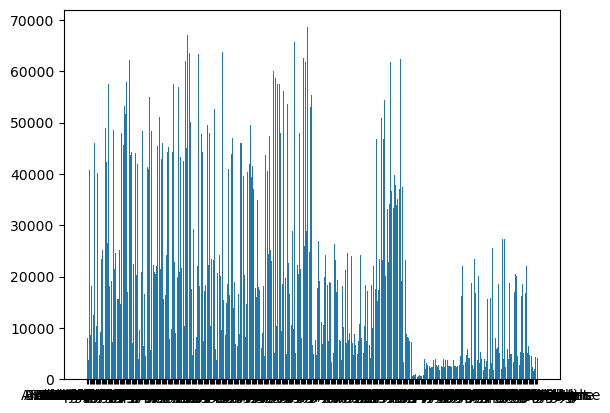

In [26]:
plot.bar(df.iloc[:,0], df.iloc[:,5])
plot.show

In [28]:
agg_functions = {'Color': 'first', '# Picked': 'sum',}
df4 = df3.groupby(df3['Color']).aggregate(agg_functions)
print(df4)

      Color  # Picked
Color                
B         B   1231450
BG       BG    110198
BR       BR     84201
C         C    964330
G         G   1322565
R         R    987591
RG       RG     72341
U         U   1120269
UB       UB     80490
UBG     UBG      6396
UBR     UBR     21829
UG       UG     85724
UR       UR     82694
URG     URG     10019
W         W   1140085
WB       WB     81391
WBG     WBG      2305
WG       WG    100893
WR       WR     77056
WRG     WRG     15845
WU       WU     65135
WUB     WUB     12136
WUG     WUG     16136


<function matplotlib.pyplot.show(close=None, block=None)>

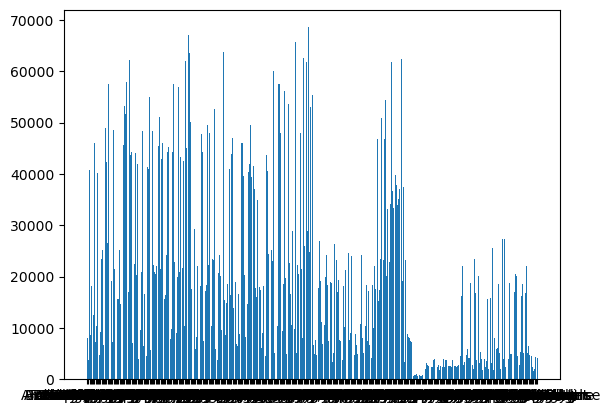

In [30]:
plot.bar(df3.iloc[:,0], df3.iloc[:,5])
plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

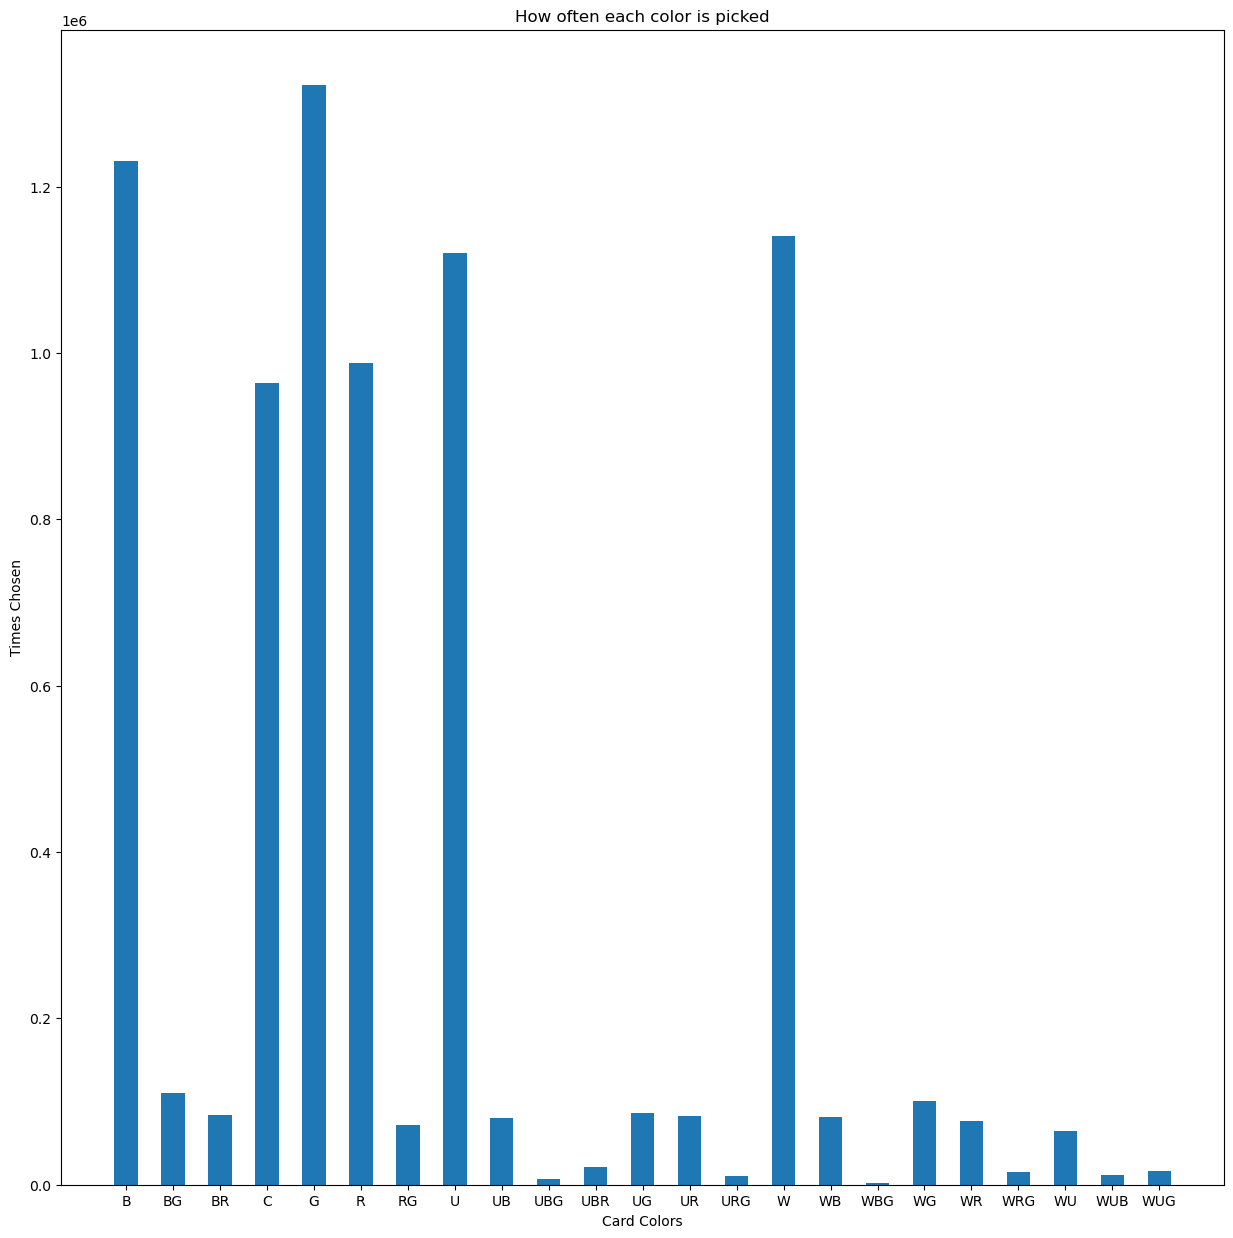

In [38]:
plot.figure(figsize=(15,15))
plot.bar(df4.iloc[:,0], df4.iloc[:,1], width=0.5)
plot.title('How often each color is picked')
plot.xlabel('Card Colors')
plot.ylabel('Times Chosen')
plot.show

In [42]:
agg_functions = {'Color': 'first', 'Color': 'count',}
df5 = df3.groupby(df3['Color']).aggregate(agg_functions)
print(df5)

       Color
Color       
B         49
BG         8
BR         8
C         46
G         49
R         49
RG         5
U         51
UB         6
UBG        1
UBR        3
UG         8
UR         7
URG        2
W         49
WB         7
WBG        1
WG         6
WR         6
WRG        3
WU         6
WUB        2
WUG        3


In [ ]:
The graph about which colors are picked the most has six columns that stand tall above the others. This can easily be explained due to 
the majority of the cards in the set being single color, and the tallest columns are those of just one color. For color pairs, Black and Green was 
chosen the most, followed by White and Green. The number of each Color and combination printed are shown above, and the numbers provided roughly
corelate to the picked amount. Some of them are slightly different due to rarity and popularity.

In [50]:
df5 = df3.sort_values('GP WR', ascending = False)
print(df5.head(10))

                          Name Color Rarity  # Seen  ALSA  # Picked   ATA  \
156  Bristly Bill, Spine Sower     G      M    6057  1.28      5089  1.28   
174            Railway Brawler     G      M    5809  1.23      5056  1.22   
300           Vaultborn Tyrant     G      M    4727  1.36      3691  1.36   
281           Collector's Cage     W      M    6164  1.75      4014  1.76   
231             Seraphic Steed    WG      R   18896  2.06     10287  2.05   
297          Bristlebud Farmer     G      M    5154  1.45      3890  1.45   
170          Ornery Tumblewagg     G      R   13397  1.40     10488  1.40   
171       Outcaster Greenblade     G      U   57923  2.54     28932  2.75   
195    Bonny Pall, Clearcutter    UG      R   14966  1.64     11113  1.58   
327        Overwhelming Forces     B      M    5812  2.23      3146  2.19   

       # GP    % GP   GP WR  
156   29948  93.90%  58.00%  
174   30618  96.40%  58.00%  
300   22036  95.10%  57.90%  
281   23278  93.20%  57.70%  
23

In [102]:
df6 =df5.head(10)
df6 = df6.sort_values('GP WR')
print(df6)

                          Name Color Rarity  # Seen  ALSA  # Picked   ATA  \
195    Bonny Pall, Clearcutter    UG      R   14966  1.64     11113  1.58   
327        Overwhelming Forces     B      M    5812  2.23      3146  2.19   
170          Ornery Tumblewagg     G      R   13397  1.40     10488  1.40   
171       Outcaster Greenblade     G      U   57923  2.54     28932  2.75   
231             Seraphic Steed    WG      R   18896  2.06     10287  2.05   
297          Bristlebud Farmer     G      M    5154  1.45      3890  1.45   
281           Collector's Cage     W      M    6164  1.75      4014  1.76   
300           Vaultborn Tyrant     G      M    4727  1.36      3691  1.36   
156  Bristly Bill, Spine Sower     G      M    6057  1.28      5089  1.28   
174            Railway Brawler     G      M    5809  1.23      5056  1.22   

       # GP    % GP   GP WR  
195   64088  92.50%  57.40%  
327   17846  91.20%  57.40%  
170   62335  95.40%  57.50%  
171  165234  92.20%  57.50%  
23

<function matplotlib.pyplot.show(close=None, block=None)>

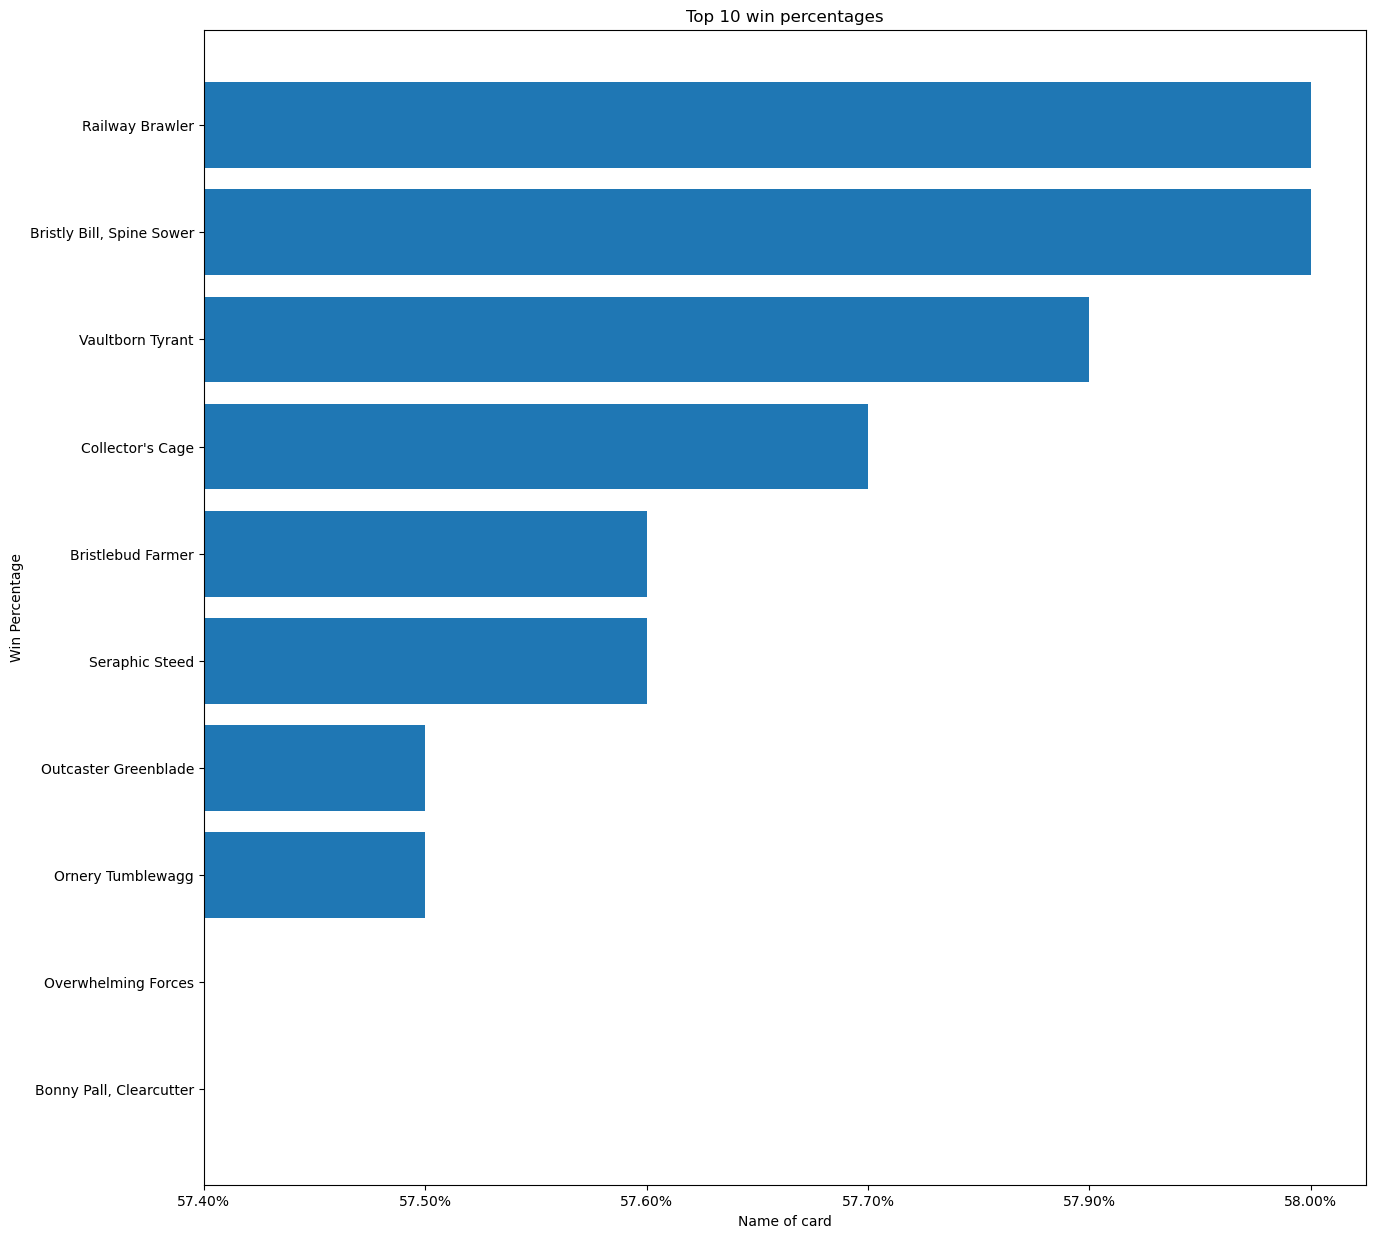

In [118]:
plot.figure(figsize=(15,15))
plot.barh(df6.iloc[:,0], df6.iloc[:,9])
plot.xlabel('Win Percentages')
plot.ylabel('Name of card')
plot.title('Top 10 Win Percentages')
plot.show

In [ ]:
While looking at the cards that won the most of the games they were a part of, we can determine which colors are most succesful.
The graph displays the top 10 cards with the highest win percentages. Out of these 10, 8 of them have green somewhere in their color identity.
6 of them are just green. It is important to note that almost all of these cards are of the mythic and rare rarity, so pulling them in a draft
would be quite difficult, but these cards are clearly powerful enough to run away with the game.

In [108]:
df7 = df3.sort_values('# Picked', ascending = False)
print(df7.head(15))

                      Name Color Rarity  # Seen  ALSA  # Picked   ATA    # GP  \
184  Throw from the Saddle     G      C  201483  3.40     68560  4.06  394270   
84            Desert's Due     B      C  238050  3.96     67050  4.89  360607   
173     Patient Naturalist     G      C  276358  4.54     65697  5.95  340160   
113        Vault Plunderer     B      C  263643  4.30     63725  5.57  346712   
85   Desperate Bloodseeker     B      C  290396  4.78     63609  6.36  331861   
93      Mourner's Surprise     B      C  338709  5.96     63395  8.12  254275   
180         Snakeskin Veil     G      C  298300  4.95     62554  6.70  319969   
261            Mirage Mesa     C      C  284689  4.36     62331  6.05  355219   
35           Trained Arynx     W      C  263522  4.46     62231  5.61  336000   
82         Consuming Ashes     B      C  215823  3.69     62012  4.44  336563   
182     Spinewoods Paladin     G      C  238534  3.86     61815  5.00  350687   
253         Conduit Pylons  

In [112]:
df8 =df7.head(15)

<function matplotlib.pyplot.show(close=None, block=None)>

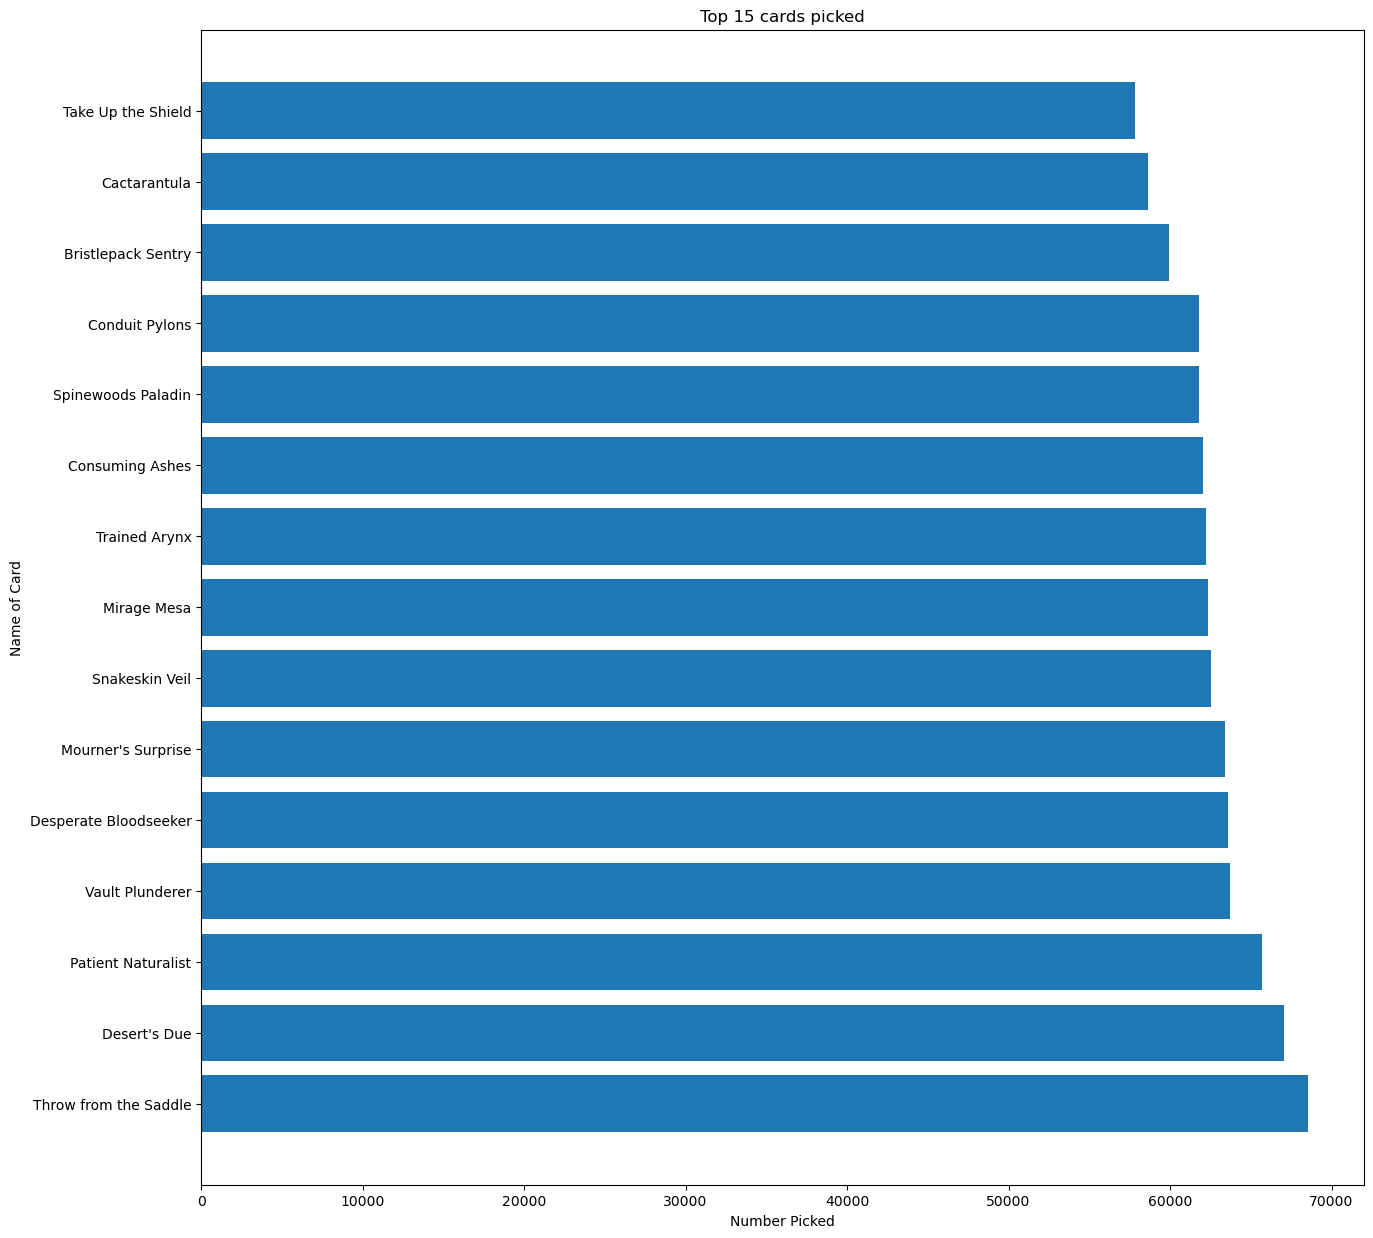

In [120]:
plot.figure(figsize=(15,15))
plot.barh(df8.iloc[:,0], df8.iloc[:,5])
plot.xlabel('Number Picked')
plot.ylabel('Name of Card')
plot.title('Top 15 cards picked')
plot.show

In [ ]:
This graph shows the top 15 most picked cards while drafting. All of these cards are of the common rairty, which is a given considering 
they are the lowest rarity and most printed. Out of these cards, 6 are green, 5 are black, 2 are white and 2 are colorless. There are no
red or blue cards within the top 15. With green having some of the most powerful cards, it would make sense that green would have more commons 
picked as well.

In [ ]:
While reviewing all the data I found, it is clear that the color green seems to have found the most success. It was the most picked color, and
it had a majority of cards within both the top win percentages and top picked. That being the case, this data has nothing to do with player skill
or preferences. It could easily be skewed depending on many factors coming from players, but the large majority of games help give a wide range
of preferences. If I were continuing to explore this in more depth, I would try to find what cards were popular and strong in each color, and then
compare them to see how well they played. It is interesting to see how each color compares in this set.
